In [1]:
!pip install pulp

In [2]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable
import matplotlib.pyplot as plt
import numpy as np

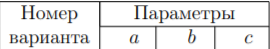


# Вариант 13
#### F(x1,x2) = x1 + x2
#### x1 + 2x2 <= 10
#### 3x1 + 2x2 <= 18
#### x1 - x2 >= -9
#### x1 - x2 <= 11

## Выражаем x2

#### A(x2) = (10 - x1) / 2
#### B(x2) = (18 - 3 * x1) / 2
#### C(x2) = x1 + 9
#### D(x2) = x1 - 11

In [3]:
x1 = np.linspace(-10, 20, 30, dtype='int')
A = (10 - x1) / 2
B = (18 - 3 * x1) / 2
C = x1 + 9
D = x1 - 11

#### Решаем задачу максимизации

In [4]:
model = LpProblem(name="resource-allocation", sense = LpMaximize)
model

resource-allocation:
MAXIMIZE
None
VARIABLES

#### Определяем переменные решения

In [5]:
x1 = LpVariable(name="x1")
x2 = LpVariable(name="x2")

#### Задаем ограничения для модели

In [6]:
A_constraint = x1 + 2 * x2 <= 10
B_constraint = 3 * x1 + 2 * x2 <= 18
C_constraint = x1 - x2 >= -9
D_constraint = x1-x2 <= 11

#Опишем и добавим целевую функцию
obj_f = x1 + 1 * x2

model += (A_constraint, "A")
model += (B_constraint, "B")
model += (C_constraint, "C")
model += (D_constraint, "D")
model += (obj_f)
model

resource-allocation:
MAXIMIZE
1*x1 + 1*x2 + 0
SUBJECT TO
A: x1 + 2 x2 <= 10

B: 3 x1 + 2 x2 <= 18

C: x1 - x2 >= -9

D: x1 - x2 <= 11

VARIABLES
x1 free Continuous
x2 free Continuous

#### Решаем задачу максимизации

In [7]:
status = model.solve()

In [10]:
print(f"Статус решения: {model.status}, {LpStatus[model.status]}")
F = model.objective.value()
print(f"Оптимальное значение целевой функции: {int(F)}")

x1_total, x2_total = 0, 0
x1_total = model.variables()[0].value()
x2_total = model.variables()[1].value()

print(f"Оптимальный план: (x1 = {int(x1_total)}, x2 = {int(x2_total)})")

Статус решения: 1, Optimal
Оптимальное значение целевой функции: 7
Оптимальный план: (x1 = 4, x2 = 3)


#### Строим график

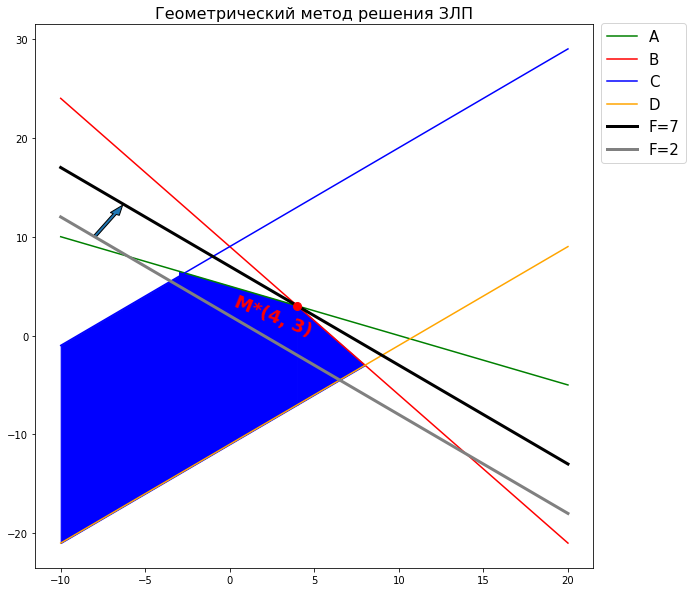

In [15]:
#новая точка
x1 = np.linspace(-10, 20, 30, dtype="int")

plt.figure(figsize=(10, 10))
plt.plot(x1, A, color='green', label='A')
# plt.text(20, -10, "A", color='green')

plt.plot(x1, B, color='red', label='B')
# plt.text(20, -23, "B", color='red')

plt.plot(x1, C, color='blue', label='C')
# plt.text(20, 23, "C", color='blue')

plt.plot(x1, D, color='orange', label='D')
n = 7
m = 15
k = 19
plt.fill_between(x1[:n], D[:n], C[:n], color='b')
plt.fill_between(x1[n-1:m], A[n-1:m], D[n-1:m], color='b')
plt.fill_between(x1[m-1:k], B[m-1:k], D[m-1:k], color='b')

plt.text(x1_total + 1,x2_total -3,f'M*({int(x1_total)}, {int(x2_total)})',horizontalalignment='right', color="red"
         , rotation=-22, fontsize=18, fontweight="bold")
x_total_graph = F - x1
plt.plot(x1, x_total_graph, color='black', label='F=7', linewidth=3)

F_test = 2
x_test_graph = F_test - x1 
plt.plot(x1, x_test_graph, color='grey', label='F=2', linewidth=3)
plt.legend(bbox_to_anchor=(1, 1.01525), fontsize=15)
plt.arrow(-8, 10, 1.2, 2.3,
         width = 0.2,
         head_length = 1)
plt.plot(x1_total, x2_total, marker="o", markersize=8, markeredgecolor="red", markerfacecolor="red")
plt.title("Геометрический метод решения ЗЛП",fontsize=16)
plt.show()